# Case Study

I am a data analyst at an online retail store called Doremi, tasked with analyzing sales data. The data provided includes various information such as the invoice number, stock code, product description, quantity of items sold in a single transaction, transaction date and time, unit price, customer ID, and the country where the store branch is located. Based on this data, I will analyze:  
1. Sales seasonality trends to determine the optimal time to stock certain products according to demand.
2. Which products have high demand.  

The findings from this report will be used for evaluation by the marketing and procurement teams to align with trends and market demand.

## Import libraries

This section contains various Python libraries used for conducting the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Load and Cleaning Data

This section contains the data to be analyzed, along with data cleaning and manipulation steps to ensure accurate and precise analysis results.

In [2]:
original = pd.read_excel('OnlineRetail.xlsx')
df = original.copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Hasil load data di atas menunjukkan bahwa dalam data ini terdapat 541.909 baris data dan 8 kolom. Selanjutkan dilakukan pemeriksaan dasar untuk mengetahui identitas data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The data above shows that there are missing values in the InvoiceNo, Description, and CustomerID columns. There is a data type error in the InvoiceNo column, where it should be numeric rather than an object. First, I will change the data type of the InvoiceNo column.

In [4]:
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')

After changing the data type of the InvoiceNo column, perform a check to verify whether the data type has been successfully updated.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532618 non-null  float64       
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 33.1+ MB


Now that all data types in the table are correct, the missing values in the InvoiceNo, CustomerID, and Description columns will be handled in another section. Next, we will check for duplicate data. If duplicates are found, we will remove them, as leaving duplicate data in the dataset could lead to inaccurate analysis results.

In [6]:
df.duplicated().sum()

5268

In [7]:
df.drop_duplicates(inplace=True)

It is known that there are 5,268 duplicate records, all of which will be removed. After the duplicates are removed, perform a check to verify whether the duplicate data has been successfully deleted.

In [8]:
df.duplicated().sum()

0

After the duplicate data has been successfully removed, perform a final check on all columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    527387 non-null  float64       
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 36.8+ MB


Next, a check will be performed on the column names to ensure consistency. This is done to facilitate the analysis process.

In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

The results of the check above show that the column names are consistent, with no white spaces or other characters aside from letters. We can now proceed with the analysis.

## Exploratory Data Analysis

Before proceeding with the analysis to answer the two main questions, a preliminary analysis will be conducted to understand the general patterns in the data. First, a descriptive statistical analysis will be performed on the Quantity and UnitPrice columns.

In [11]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


The results of the descriptive analysis above show several points:

1. The minimum values in the Quantity and UnitPrice columns are negative.
    - The price of an item cannot be negative; this could be caused by factors such as data entry errors.
    - Negative quantities may be due to product returns or data entry errors. Further analysis will be conducted on this.
2. The data distribution is uneven.
    - The large difference between the mean and standard deviation of both columns indicates an uneven distribution.
    - In the Quantity column, the range between the minimum and maximum values is very wide, indicating the presence of outliers.
    - In the UnitPrice column, there is a significant price range difference, suggesting the possibility of anomaly pricing.
3. Quartile statistics:

    - In a single transaction, 50% of the items sold were 3 units or fewer. Meanwhile, 75% of items sold were 10 units or fewer in one transaction. Transactions with very large quantities are not common in this data.
    - Most items are sold at low prices, between $1.25 and $4.13, while higher unit prices are likely associated with luxury items.

Analysis to determine the location of Doremi store branches.

In [12]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [13]:
df['Country'].nunique()

38

In [14]:
mode = df['Country'].value_counts()
mode

Country
United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


It is known that there are 38 Doremi store branches in various countries. The highest number of branches is in the United Kingdom, with 490,300 branches, while other countries have fewer than 10,000 branches. This data indicates that the analysis will likely represent data from the United Kingdom predominantly. Therefore, the analysis will be conducted separately.

### Handling outliers

In [15]:
# numeric data only
num_cols = df.select_dtypes(include=['float64','int64'])

#list to save skewness information
listItem= []

# loop for every numeric columns
for col in num_cols:
  #count skewness
  skew_value = round(df[col].skew(), 2) 
  #Interpretation of Skewness Calculation Results
  distribution = np.where((skew_value <= 0.5) & (skew_value >= -0.5),'normal', 'skewed')
  #insert interpretation results into list
  listItem.append([col, skew_value, distribution])
  #List to item
  skewness = pd.DataFrame(columns=['nama_kolom', 'nilai_skewness', 'distribution'], data=listItem)
skewness

,nama_kolom,nilai_skewness,distribution
0,InvoiceNo,-0.11,normal
1,Quantity,-0.26,normal
2,UnitPrice,185.60,skewed
3,CustomerID,0.03,normal


In [16]:
#list to store column information, lower bound, upper bound
column = []
lower_bound = []
upper_bound = []

#loop through each row in the skewness DataFrame
for row in range(0, len(skewness)):
    col = skewness['nama_kolom'][row]
    
    #Check lower and upper bounds
    if skewness['distribution'][row] == 'skewed':
        # Calculate IQR (Interquartile Range)
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        # Calculate lower and upper bounds
        lower_boundary = df[col].quantile(0.25) - (IQR * 3)
        upper_boundary = df[col].quantile(0.75) + (IQR * 3)
    else:
        #Use mean and standard deviation for columns that are not skewed
        lower_boundary = df[col].mean() - 3 * df[col].std()
        upper_boundary = df[col].mean() + 3 * df[col].std()
    #Use a multiplier of 3 because the data in the dataframe is highly skewed

    #Add column name and bounds to the list
    column.append(col)
    lower_bound.append(lower_boundary)
    upper_bound.append(upper_boundary)

    #list to column
    boundaries_df = pd.DataFrame({'column': column,'lower_bound': lower_bound,'upper_bound': upper_bound})
boundaries_df

,column,lower_bound,upper_bound
0,InvoiceNo,519690.296560,600190.170061
1,Quantity,-647.770439,667.010497
2,UnitPrice,-7.390000,12.770000
3,CustomerID,10139.142552,20423.179083


1. InvoiceNo: Most invoice numbers fall within the range of 519,690.30 to 600,190.17, indicating a structured numerical sequence without significant outliers.
2. Quantity: The range of -647.77 to 667.01 suggests the presence of negative quantities, potentially indicating returns or cancellations. These should be further analyzed for validation.
3. UnitPrice: Prices mostly range from -7.39 to 12.77, with negative values potentially representing data entry errors or refunds. Such anomalies warrant closer investigation.
4. CustomerID: Customer IDs lie within 10,139.14 to 20,423.18, suggesting a well-defined numeric system, likely without significant outliers.

In [17]:
# list to store the percentage of outliers
percentage = []

#loop to calculate the percentage of outliers
for row in range(0, len(column)):
    col = column[row]

    # calculate the percentage of outliers based on the upper and lower bounds
    total_outlier = (
        (len(df[df[col] > upper_bound[row]]) / len(df) * 100) + 
        (len(df[df[col] < lower_bound[row]]) / len(df) * 100)
    )

    # append the calculated percentage to the percentage list
    percentage.append(total_outlier)

# create a dataframe for the percentage of outliers
outliers = pd.DataFrame({
    'column':column,
    'persentase': [round(percent, 2) for percent in percentage]
})

# display the result
outliers

,column,persentase
0,InvoiceNo,0.00
1,Quantity,0.06
2,UnitPrice,2.39
3,CustomerID,0.00


1. InvoiceNo : no outliers
2. Quantity: Only 0.06% of data points are outliers, suggesting minimal irregularities in quantities.
3. UnitPrice: 2.39% of data points are outliers, likely caused by extreme or incorrect pricing values. This warrants further investigation into possible data entry errors or exceptional cases.
4. CustomerID: no outliers

In [18]:
# define a function for capping using the 1st and 99th percentiles
def capping(num_cols, column):
    lower_cap = num_cols[column].quantile(0.01)
    upper_cap = num_cols[column].quantile(0.99)

    # if there are values < lower cap, those values will be replaced with the lower cap value
    num_cols[column] = np.where(num_cols[column] < lower_cap, lower_cap, num_cols[column])
    # if there are values > upper cap, those values will be replaced with the upper cap value
    num_cols[column] = np.where(num_cols[column] > upper_cap, upper_cap, num_cols[column])
    return num_cols

# loop to apply capping to each column
for col in num_cols:
    num_cols_capped = capping(num_cols, col)

Showing data after all of the outliers were capped.

In [19]:
df = pd.concat([num_cols, df.drop(columns=num_cols.columns)], axis=1)
df

,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode,Description,InvoiceDate,Country
0,536862.0,6.0,2.55,17850.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,536862.0,6.0,3.39,17850.0,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,536862.0,8.0,2.75,17850.0,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,536862.0,6.0,3.39,17850.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,536862.0,6.0,3.39,17850.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581219.0,12.0,0.85,12680.0,22613,PACK OF 20 SPACEBOY NAPKINS,2011-12-09 12:50:00,France
541905,581219.0,6.0,2.10,12680.0,22899,CHILDREN'S APRON DOLLY GIRL,2011-12-09 12:50:00,France
541906,581219.0,4.0,4.15,12680.0,23254,CHILDRENS CUTLERY DOLLY GIRL,2011-12-09 12:50:00,France
541907,581219.0,4.0,4.15,12680.0,23255,CHILDRENS CUTLERY CIRCUS PARADE,2011-12-09 12:50:00,France


### Handling missing value

In [20]:
missing_customerID = df['CustomerID'].isnull().sum() / len(df) * 100
missing_invoice = df['InvoiceNo'].isnull().sum() / len(df) * 100
missing_description = df['Description'].isnull().sum() / len(df) * 100
print(f"Missing value at CustomerID: {missing_customerID:.2f}%")
print(f"Missing value at InvoiceNo: {missing_invoice:.2f}%")
print(f"Missing value at Description: {missing_description:.2f}%")

Missing value at CustomerID: 25.16%
Missing value at InvoiceNo: 1.72%
Missing value at Description: 0.27%


- CustomerID: The missing values in the CustomerID column account for 25%, a significant amount. Analysis should be conducted separately for sales data with and without CustomerID to ensure clarity and avoid skewed results.

- InvoiceNo: Although the missing value percentage for InvoiceNo is only 1.72%, this can still pose challenges for tracking transactions. Addressing these missing values is crucial for maintaining transaction traceability.

- Description: While the percentage of missing values in the Description column is minimal, these can be resolved by referencing the StockCode, as products with the same StockCode are expected to have consistent descriptions

#### Handling Missing value InvoiceNo

Displaying the top 10 rows, bottom 10 rows, and 10 random samples to observe the pattern of missing values.

In [21]:
missing_invoice = df[df['InvoiceNo'].isnull()]
missing_invoice.head(10)

,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode,Description,InvoiceDate,Country
141,NaN,-1.0,18.00,14527.0,D,Discount,2010-12-01 09:41:00,United Kingdom
154,NaN,-1.0,4.65,15311.0,35004C,SET OF 3 COLOURED FLYING DUCKS,2010-12-01 09:49:00,United Kingdom
235,NaN,-2.0,1.65,17548.0,22556,PLASTERS IN TIN CIRCUS PARADE,2010-12-01 10:24:00,United Kingdom
236,NaN,-2.0,0.29,17548.0,21984,PACK OF 12 PINK PAISLEY TISSUES,2010-12-01 10:24:00,United Kingdom
237,NaN,-2.0,0.29,17548.0,21983,PACK OF 12 BLUE PAISLEY TISSUES,2010-12-01 10:24:00,United Kingdom
238,NaN,-2.0,0.29,17548.0,21980,PACK OF 12 RED RETROSPOT TISSUES,2010-12-01 10:24:00,United Kingdom
239,NaN,-2.0,3.45,17548.0,21484,CHICK GREY HOT WATER BOTTLE,2010-12-01 10:24:00,United Kingdom
240,NaN,-2.0,1.65,17548.0,22557,PLASTERS IN TIN VINTAGE PAISLEY,2010-12-01 10:24:00,United Kingdom
241,NaN,-2.0,1.65,17548.0,22553,PLASTERS IN TIN SKULLS,2010-12-01 10:24:00,United Kingdom
939,NaN,-2.0,4.25,17897.0,22960,JAM MAKING SET WITH JARS,2010-12-01 12:38:00,United Kingdom


In [22]:
missing_invoice.tail(10)

,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode,Description,InvoiceDate,Country
540141,NaN,-2.0,2.10,13599.0,21314,SMALL GLASS HEART TRINKET POT,2011-12-08 19:26:00,United Kingdom
540142,NaN,-2.0,0.39,13599.0,22098,BOUDOIR SQUARE TISSUE BOX,2011-12-08 19:26:00,United Kingdom
540176,NaN,-2.0,2.08,17924.0,23084,RABBIT NIGHT LIGHT,2011-12-08 19:28:00,United Kingdom
540422,NaN,-2.0,2.08,16446.0,23843,"PAPER CRAFT , LITTLE BIRDIE",2011-12-09 09:27:00,United Kingdom
540448,NaN,-2.0,1.95,14397.0,22178,VICTORIAN GLASS HANGING T-LIGHT,2011-12-09 09:57:00,United Kingdom
540449,NaN,-2.0,0.83,14397.0,23144,ZINC T-LIGHT HOLDER STARS SMALL,2011-12-09 09:57:00,United Kingdom
541541,NaN,-1.0,18.00,15498.0,M,Manual,2011-12-09 10:28:00,United Kingdom
541715,NaN,-2.0,10.95,15311.0,21258,VICTORIAN SEWING BOX LARGE,2011-12-09 11:57:00,United Kingdom
541716,NaN,-1.0,1.25,17315.0,84978,HANGING HEART JAR T-LIGHT HOLDER,2011-12-09 11:58:00,United Kingdom
541717,NaN,-2.0,1.25,17315.0,20979,36 PENCILS TUBE RED RETROSPOT,2011-12-09 11:58:00,United Kingdom


In [23]:
missing_invoice.sample(10)

,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode,Description,InvoiceDate,Country
263165,NaN,-2.0,0.42,14426.0,22023,EMPIRE BIRTHDAY CARD,2011-07-14 10:19:00,United Kingdom
467437,NaN,-1.0,18.00,14096.0,CRUK,CRUK Commission,2011-11-14 15:27:00,United Kingdom
385942,NaN,-2.0,3.74,13113.0,23298,SPOTTY BUNTING,2011-10-09 12:56:00,United Kingdom
88152,NaN,-2.0,1.25,13102.0,21871,SAVE THE PLANET MUG,2011-02-11 16:10:00,United Kingdom
133800,NaN,-2.0,2.95,17204.0,22967,SET 3 SONG BIRD PAPER EGGS ASSORTED,2011-03-25 12:43:00,United Kingdom
447634,NaN,-1.0,2.95,15066.0,22666,RECIPE BOX PANTRY YELLOW DESIGN,2011-11-08 09:56:00,United Kingdom
24188,NaN,-2.0,1.65,15514.0,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,2010-12-10 14:03:00,United Kingdom
72926,NaN,-2.0,1.25,12578.0,22099,CARAVAN SQUARE TISSUE BOX,2011-01-27 10:01:00,Italy
235932,NaN,-2.0,3.75,NaN,22730,ALARM CLOCK BAKELIKE IVORY,2011-06-21 17:59:00,EIRE
464806,NaN,-2.0,1.65,12476.0,22555,PLASTERS IN TIN STRONGMAN,2011-11-14 11:23:00,Germany


The results of this inspection indicate that the missing values in the InvoiceNo column are associated with negative values in the Quantity column. To verify this assumption, the following check is performed:

In [24]:
missing_invoice_neg_qty = df[(df['InvoiceNo'].isnull()) & (df['Quantity'] < 0)]
missing_invoice_neg_qty.head(10)

,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode,Description,InvoiceDate,Country
141,NaN,-1.0,18.00,14527.0,D,Discount,2010-12-01 09:41:00,United Kingdom
154,NaN,-1.0,4.65,15311.0,35004C,SET OF 3 COLOURED FLYING DUCKS,2010-12-01 09:49:00,United Kingdom
235,NaN,-2.0,1.65,17548.0,22556,PLASTERS IN TIN CIRCUS PARADE,2010-12-01 10:24:00,United Kingdom
236,NaN,-2.0,0.29,17548.0,21984,PACK OF 12 PINK PAISLEY TISSUES,2010-12-01 10:24:00,United Kingdom
237,NaN,-2.0,0.29,17548.0,21983,PACK OF 12 BLUE PAISLEY TISSUES,2010-12-01 10:24:00,United Kingdom
238,NaN,-2.0,0.29,17548.0,21980,PACK OF 12 RED RETROSPOT TISSUES,2010-12-01 10:24:00,United Kingdom
239,NaN,-2.0,3.45,17548.0,21484,CHICK GREY HOT WATER BOTTLE,2010-12-01 10:24:00,United Kingdom
240,NaN,-2.0,1.65,17548.0,22557,PLASTERS IN TIN VINTAGE PAISLEY,2010-12-01 10:24:00,United Kingdom
241,NaN,-2.0,1.65,17548.0,22553,PLASTERS IN TIN SKULLS,2010-12-01 10:24:00,United Kingdom
939,NaN,-2.0,4.25,17897.0,22960,JAM MAKING SET WITH JARS,2010-12-01 12:38:00,United Kingdom


In [25]:
missing_invoice_neg_qty.tail(10)

,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode,Description,InvoiceDate,Country
540141,NaN,-2.0,2.10,13599.0,21314,SMALL GLASS HEART TRINKET POT,2011-12-08 19:26:00,United Kingdom
540142,NaN,-2.0,0.39,13599.0,22098,BOUDOIR SQUARE TISSUE BOX,2011-12-08 19:26:00,United Kingdom
540176,NaN,-2.0,2.08,17924.0,23084,RABBIT NIGHT LIGHT,2011-12-08 19:28:00,United Kingdom
540422,NaN,-2.0,2.08,16446.0,23843,"PAPER CRAFT , LITTLE BIRDIE",2011-12-09 09:27:00,United Kingdom
540448,NaN,-2.0,1.95,14397.0,22178,VICTORIAN GLASS HANGING T-LIGHT,2011-12-09 09:57:00,United Kingdom
540449,NaN,-2.0,0.83,14397.0,23144,ZINC T-LIGHT HOLDER STARS SMALL,2011-12-09 09:57:00,United Kingdom
541541,NaN,-1.0,18.00,15498.0,M,Manual,2011-12-09 10:28:00,United Kingdom
541715,NaN,-2.0,10.95,15311.0,21258,VICTORIAN SEWING BOX LARGE,2011-12-09 11:57:00,United Kingdom
541716,NaN,-1.0,1.25,17315.0,84978,HANGING HEART JAR T-LIGHT HOLDER,2011-12-09 11:58:00,United Kingdom
541717,NaN,-2.0,1.25,17315.0,20979,36 PENCILS TUBE RED RETROSPOT,2011-12-09 11:58:00,United Kingdom


In [26]:
missing_invoice_neg_qty.sample(10)

,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode,Description,InvoiceDate,Country
250423,NaN,-1.0,1.95,16571.0,84857C,PINK MONTE CARLO HANDBAG,2011-07-05 14:51:00,United Kingdom
32385,NaN,-1.0,9.95,17912.0,37449,CERAMIC CAKE STAND + HANGING CAKES,2010-12-15 16:54:00,United Kingdom
501795,NaN,-2.0,2.10,13069.0,22380,TOY TIDY SPACEBOY,2011-11-25 15:18:00,United Kingdom
383054,NaN,-2.0,3.39,15606.0,21479,WHITE SKULL HOT WATER BOTTLE,2011-10-06 20:33:00,United Kingdom
520141,NaN,-2.0,0.59,12536.0,22232,JIGSAW TOADSTOOLS 3 PIECE,2011-12-02 12:43:00,France
300944,NaN,-2.0,1.65,16150.0,22469,HEART OF WICKER SMALL,2011-08-14 14:22:00,United Kingdom
32751,NaN,-2.0,2.95,12494.0,22667,RECIPE BOX RETROSPOT,2010-12-16 11:24:00,France
217766,NaN,-2.0,1.25,12567.0,23076,ICE CREAM SUNDAE LIP GLOSS,2011-06-08 09:14:00,France
138283,NaN,-1.0,1.65,14680.0,22383,LUNCH BAG SUKI DESIGN,2011-03-29 15:27:00,United Kingdom
140745,NaN,-2.0,7.95,16801.0,48187,DOORMAT NEW ENGLAND,2011-03-31 11:58:00,United Kingdom


Based on this examination, it can be confirmed that the missing values in the InvoiceNo column are related to negative values in the Quantity column. A preliminary assumption suggests that the negative values in the Quantity column are due to product returns. It is concluded that the missing values in the InvoiceNo column are categorized as Missing at Random. However, further analysis can be performed on this data. Instead of imputing these missing values, the data will be separated into two groups: one with negative Quantity values and one without.

In [27]:
new_df = df[df['Quantity'] >= 0]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526054 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526051 non-null  float64       
 1   Quantity     526054 non-null  float64       
 2   UnitPrice    526054 non-null  float64       
 3   CustomerID   392732 non-null  float64       
 4   StockCode    526054 non-null  object        
 5   Description  525462 non-null  object        
 6   InvoiceDate  526054 non-null  datetime64[ns]
 7   Country      526054 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 36.1+ MB


There are still missing values in the InvoiceNo column, namely:

In [28]:
missing_invoice_1 = new_df[new_df['InvoiceNo'].isnull()]
missing_invoice_1

,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode,Description,InvoiceDate,Country
299982,NaN,1.0,18.00,NaN,B,Adjust bad debt,2011-08-12 14:50:00,United Kingdom
299983,NaN,1.0,0.19,NaN,B,Adjust bad debt,2011-08-12 14:51:00,United Kingdom
299984,NaN,1.0,0.19,NaN,B,Adjust bad debt,2011-08-12 14:52:00,United Kingdom


This time, the missing values in the InvoiceNo column appear alongside missing values in the CustomerID column from the UK. Since there are only three missing values, and the transactions were conducted in the country with the most Doremi store branches, these missing values will be dropped due to their minimal quantity. Additionally, they can still be represented by other data from the UK, as the UK is the majority country.

In [29]:
new_df = new_df.dropna(subset=['InvoiceNo'])

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526051 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526051 non-null  float64       
 1   Quantity     526051 non-null  float64       
 2   UnitPrice    526051 non-null  float64       
 3   CustomerID   392732 non-null  float64       
 4   StockCode    526051 non-null  object        
 5   Description  525459 non-null  object        
 6   InvoiceDate  526051 non-null  datetime64[ns]
 7   Country      526051 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 36.1+ MB


The missing values in the InvoiceNo column have been resolved.

#### Handling Missing Value Description

Display the top 10 rows, bottom 10 rows, and 10 random samples to observe the pattern of missing values.

In [31]:
missing_description = new_df[new_df['Description'].isnull()]
missing_description.head(10)

,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode,Description,InvoiceDate,Country
622,536862.0,56.0,0.19,NaN,22139,NaN,2010-12-01 11:52:00,United Kingdom
1970,536862.0,1.0,0.19,NaN,21134,NaN,2010-12-01 14:32:00,United Kingdom
1971,536862.0,1.0,0.19,NaN,22145,NaN,2010-12-01 14:33:00,United Kingdom
1972,536862.0,1.0,0.19,NaN,37509,NaN,2010-12-01 14:33:00,United Kingdom
1987,536862.0,1.0,0.19,NaN,85226A,NaN,2010-12-01 14:34:00,United Kingdom
1988,536862.0,1.0,0.19,NaN,85044,NaN,2010-12-01 14:34:00,United Kingdom
2024,536862.0,1.0,0.19,NaN,20950,NaN,2010-12-01 14:34:00,United Kingdom
2025,536862.0,3.0,0.19,NaN,37461,NaN,2010-12-01 14:35:00,United Kingdom
2026,536862.0,23.0,0.19,NaN,84670,NaN,2010-12-01 14:35:00,United Kingdom
4348,536862.0,19.0,0.19,NaN,84952C,NaN,2010-12-02 14:43:00,United Kingdom


In [32]:
missing_description.tail(10)

,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode,Description,InvoiceDate,Country
519967,580197.0,6.0,0.19,NaN,22696,NaN,2011-12-02 12:04:00,United Kingdom
524473,580580.0,10.0,0.19,NaN,21804,NaN,2011-12-05 10:33:00,United Kingdom
524475,580588.0,5.0,0.19,NaN,21808,NaN,2011-12-05 10:35:00,United Kingdom
529667,580743.0,1.0,0.19,NaN,47591B,NaN,2011-12-06 09:30:00,United Kingdom
533711,581102.0,20.0,0.19,NaN,21803,NaN,2011-12-07 11:57:00,United Kingdom
533712,581103.0,4.0,0.19,NaN,22689,NaN,2011-12-07 11:58:00,United Kingdom
535326,581203.0,15.0,0.19,NaN,23406,NaN,2011-12-07 18:31:00,United Kingdom
535332,581209.0,6.0,0.19,NaN,21620,NaN,2011-12-07 18:35:00,United Kingdom
536981,581219.0,27.0,0.19,NaN,72817,NaN,2011-12-08 10:33:00,United Kingdom
538554,581219.0,20.0,0.19,NaN,85175,NaN,2011-12-08 14:06:00,United Kingdom


In [33]:
missing_description.sample(10)

,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode,Description,InvoiceDate,Country
390976,570645.0,24.0,0.19,NaN,84247E,NaN,2011-10-11 12:44:00,United Kingdom
136267,547948.0,100.0,0.19,NaN,71038,NaN,2011-03-28 15:06:00,United Kingdom
142774,548639.0,1.0,0.19,NaN,22627,NaN,2011-04-01 12:34:00,United Kingdom
280660,561483.0,4.0,0.19,NaN,77079,NaN,2011-07-27 13:40:00,United Kingdom
204600,554677.0,9.0,0.19,NaN,20664,NaN,2011-05-25 16:03:00,United Kingdom
205714,554830.0,3.0,0.19,NaN,21904,NaN,2011-05-26 15:22:00,United Kingdom
85487,543472.0,1.0,0.19,NaN,22451,NaN,2011-02-08 15:01:00,United Kingdom
381842,569895.0,100.0,0.19,NaN,23348,NaN,2011-10-06 15:55:00,United Kingdom
204590,554673.0,24.0,0.19,NaN,35653,NaN,2011-05-25 16:01:00,United Kingdom
489202,577968.0,2.0,0.19,NaN,85135B,NaN,2011-11-22 12:12:00,United Kingdom


The results show that the missing values in the Description column, the price of 0.0, missing values in the CustomerID column, and the UK are related. It can be concluded that the missing values in the Description column are classified as Missing at Random. Similar to the missing values in the InvoiceNo column, no imputation will be performed for the Description column. Instead, data without missing values will be separated into a new dataframe for analysis, while data with missing values can be analyzed separately.

In [34]:
new_df_2 = new_df.dropna(subset=['Description'])
new_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525459 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    525459 non-null  float64       
 1   Quantity     525459 non-null  float64       
 2   UnitPrice    525459 non-null  float64       
 3   CustomerID   392732 non-null  float64       
 4   StockCode    525459 non-null  object        
 5   Description  525459 non-null  object        
 6   InvoiceDate  525459 non-null  datetime64[ns]
 7   Country      525459 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 36.1+ MB


The missing values in the Description column have been resolved.

### Analysis of Data Without Missing Values in the CustomerID Column

1. Sales seasonality trends to determine the right time to stock certain items based on demand

Create a new dataframe where there are no missing values.

In [35]:
no_misval = new_df_2.dropna(subset=['CustomerID'])
no_misval.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  float64       
 1   Quantity     392732 non-null  float64       
 2   UnitPrice    392732 non-null  float64       
 3   CustomerID   392732 non-null  float64       
 4   StockCode    392732 non-null  object        
 5   Description  392732 non-null  object        
 6   InvoiceDate  392732 non-null  datetime64[ns]
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 27.0+ MB


Add a new column based on time.

In [36]:
no_misval['Month'] = no_misval['InvoiceDate'].dt.month  
no_misval['Weekday'] = no_misval['InvoiceDate'].dt.day_name()  
no_misval['Year'] = no_misval['InvoiceDate'].dt.year  


Add a total sales column

In [37]:
no_misval['TotalSales'] = no_misval['Quantity'] * no_misval['UnitPrice']


Group the data by month and calculate the total sales.

In [38]:
monthly_sales = no_misval.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()
monthly_sales_by_month = no_misval.groupby('Month')['TotalSales'].sum().reset_index()
monthly_sales_by_month


,Month,TotalSales
0,1,422284.02
1,2,400950.61
2,3,525939.49
3,4,403370.27
4,5,602686.37
5,6,540847.88
6,7,530293.97
7,8,553990.06
8,9,817263.84
9,10,888480.39


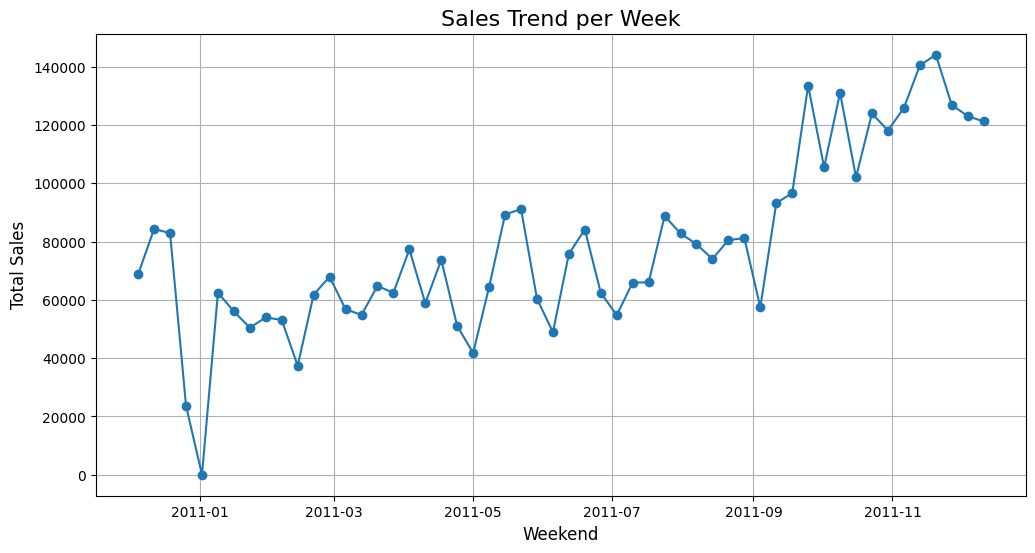

In [39]:
no_misval['InvoiceDate'] = pd.to_datetime(no_misval['InvoiceDate'])

# Set colunn InvoiceDate as index
no_misval.set_index('InvoiceDate', inplace=True)

# Agregate total Quantity per week
weekly_sales = no_misval['Quantity'].resample('W').sum().reset_index()

# Visualize Sales Trend per Week 
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['InvoiceDate'], weekly_sales['Quantity'], marker='o', linestyle='-')
plt.title('Sales Trend per Week', fontsize=16)
plt.xlabel('Weekend', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid()
plt.show()


1. Sales Spikes During Specific Periods  
    The chart shows a clear spike in sales during certain weeks, especially at the start of the year (January) and towards the last quarter (September-November). This trend likely coincides with holiday seasons, such as New Year celebrations, or peak shopping events like year-end promotions.  

    Since sales spike during holiday seasons (like New Year and year-end promotions), businesses should plan targeted campaigns and attractive discounts well in advance. For example, launching promotions before holidays can maximize revenue from increased consumer spending.

2. Drastic Decline in Early January  
    There is a significant drop in sales at the beginning of January, which could be due to post-holiday spending fatigue, where consumers reduce their spending after the New Year celebrations.

    To counter the sharp decline in early January, businesses can introduce post-holiday deals or limited-time offers to maintain consumer interest. This strategy can help stabilize sales after the holiday rush.

Which items have high demand during a certain season?

In [40]:
# function to grouping by season
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Add column Season into DataFrame
no_misval['Season'] = no_misval['Month'].apply(get_season)


In [41]:
# Agregate total Quantity per Season and Description
seasonal_demand = no_misval.groupby(['Season', 'Description'])['Quantity'].sum().reset_index()

# Filtering base on Season and Quantity
seasonal_demand = seasonal_demand.sort_values(by=['Season', 'Quantity'], ascending=[True, False])


In [42]:
# Get Top 5 items per Season
top_items_per_season = seasonal_demand.groupby('Season').head(5)
top_items_per_season


,Season,Description,Quantity
2043,Autumn,POPCORN HOLDER,11522.0
1385,Autumn,JUMBO BAG RED RETROSPOT,10969.0
2081,Autumn,RABBIT NIGHT LIGHT,10431.0
3042,Autumn,WORLD WAR 2 GLIDERS ASSTD DESIGNS,9764.0
1835,Autumn,PAPER CHAIN KIT 50'S CHRISTMAS,9198.0
4400,Spring,JUMBO BAG RED RETROSPOT,8005.0
3263,Spring,ASSORTED COLOUR BIRD ORNAMENT,7086.0
5850,Spring,WORLD WAR 2 GLIDERS ASSTD DESIGNS,6896.0
5784,Spring,WHITE HANGING HEART T-LIGHT HOLDER,6861.0
4778,Spring,PACK OF 72 RETROSPOT CAKE CASES,6661.0


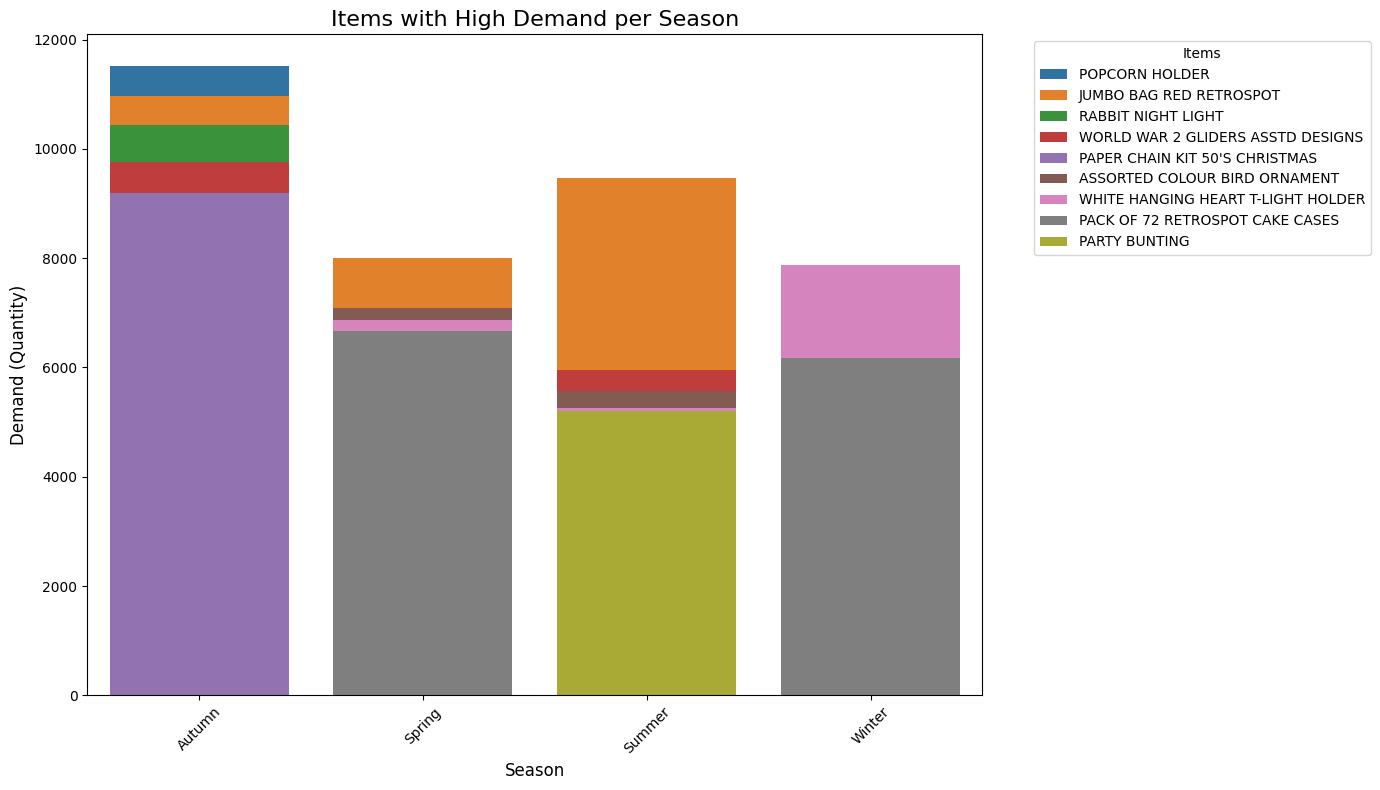

In [43]:
# Visualize 

plt.figure(figsize=(14, 8))
sns.barplot(data=top_items_per_season, x='Season', y='Quantity', hue='Description', dodge=False)
plt.title('Items with High Demand per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Demand (Quantity)', fontsize=12)
plt.legend(title='Items', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Autumn and Summer Dominate Demand  
    The chart shows that Autumn has the highest demand, driven by "White Hanging Heart T-Light Holder" and other items. Summer follows closely, dominated by the "Jumbo Bag Red Retrospot" and "Party Bunting," which are likely tied to outdoor events, parties, or seasonal celebrations.  

    Focus on items like "White Hanging Heart T-Light Holder" for Autumn and "Jumbo Bag Red Retrospot" for Summer. Businesses can promote these items during the seasonal transition to meet high demand and increase revenue.

2. Winter and Spring Have Niche Demand  
    Winter shows relatively high demand for "Pack of 72 Retrospot Cake Cases" and "White Hanging Heart T-Light Holder," suggesting items related to decorations or gifts. Spring has lower demand but is still driven by a few essential items like "Jumbo Bag Red Retrospot."  

    Boost demand in Winter and Spring by bundling popular items like cake cases or light holders for themed campaigns, such as winter festivities or spring sales, to maintain year-round business stability.

### Analyze the data that has missing values in the CustomerID column.

Make a new dataframe for data that contain missing value at CustomerID only

In [44]:
missing_customerID = new_df_2[new_df_2['CustomerID'].isna()]
missing_customerID.info()


<class 'pandas.core.frame.DataFrame'>
Index: 132727 entries, 1443 to 541540
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    132727 non-null  float64       
 1   Quantity     132727 non-null  float64       
 2   UnitPrice    132727 non-null  float64       
 3   CustomerID   0 non-null       float64       
 4   StockCode    132727 non-null  object        
 5   Description  132727 non-null  object        
 6   InvoiceDate  132727 non-null  datetime64[ns]
 7   Country      132727 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 9.1+ MB


In [45]:
# Add new colummns base on time
missing_customerID['Month'] = missing_customerID['InvoiceDate'].dt.month  # Bulan
missing_customerID['Weekday'] = missing_customerID['InvoiceDate'].dt.day_name()  # Hari dalam seminggu
missing_customerID['Year'] = missing_customerID['InvoiceDate'].dt.year  # Tahun


In [46]:
# add column total sales
missing_customerID['TotalSales'] = missing_customerID['Quantity'] * missing_customerID['UnitPrice']


In [47]:
# grouping data base on sales in a month period
monthly_sales_2 = missing_customerID.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()
monthly_sales_by_month_2 = missing_customerID.groupby('Month')['TotalSales'].sum().reset_index()
monthly_sales_by_month_2


,Month,TotalSales
0,1,106776.33
1,2,65299.95
2,3,101932.30
3,4,60391.21
4,5,79631.63
5,6,84140.44
6,7,95736.39
7,8,87459.21
8,9,88911.83
9,10,100162.40


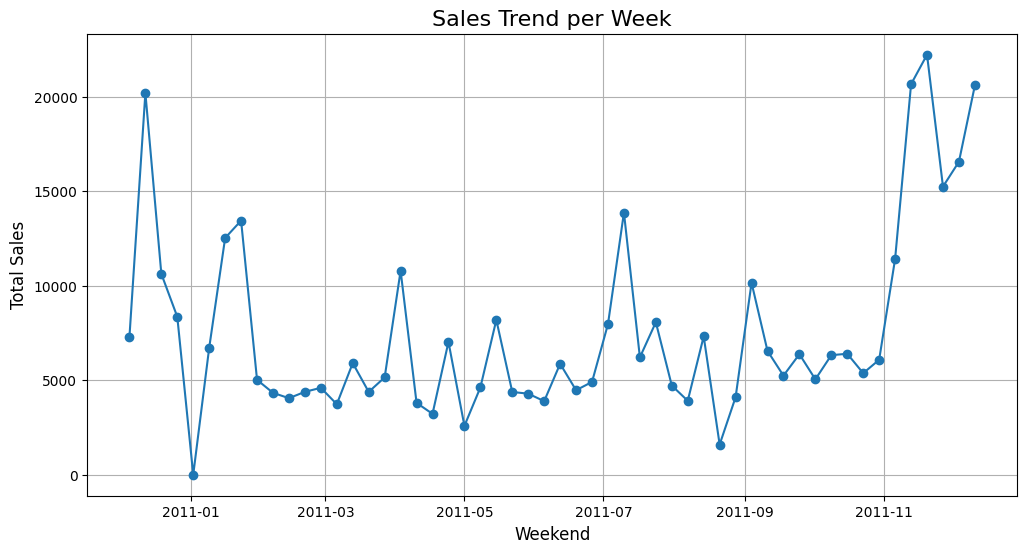

In [48]:
missing_customerID['InvoiceDate'] = pd.to_datetime(missing_customerID['InvoiceDate'])

# Set kolcolumns om InvoiceDate as index
missing_customerID.set_index('InvoiceDate', inplace=True)

# Agregate total Quantity per week
weekly_sales_2 = missing_customerID['Quantity'].resample('W').sum().reset_index()

# Visualize 

plt.figure(figsize=(12, 6))
plt.plot(weekly_sales_2['InvoiceDate'], weekly_sales_2['Quantity'], marker='o', linestyle='-')
plt.title('Sales Trend per Week', fontsize=16)
plt.xlabel('Weekend', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid()
plt.show()


The graph from the data with missing values in the "Customer ID" column shows a trend similar to the graph from the data without missing values. However, the difference lies in the observation that between February and October, sales remain relatively low with occasional minor increases, indicating a seasonal drop in demand during these months.To counter the mid-year slump, businesses can introduce special promotions, flash sales, or seasonal campaigns. Collaborating with relevant seasonal themes (e.g., school holidays or summer) can boost mid-year demand.

Which items have high demand during a certain season?

In [49]:
# Add column Season to DataFrame
missing_customerID['Season'] = missing_customerID['Month'].apply(get_season)


In [50]:
# Agregate total Quantity per Season and Description
seasonal_demand_2 = missing_customerID.groupby(['Season', 'Description'])['Quantity'].sum().reset_index()

# Sort base on Season and Quantity
seasonal_demand_2 = seasonal_demand_2.sort_values(by=['Season', 'Quantity'], ascending=[True, False])


In [51]:
# Pick top 5 items per Season
top_items_per_season_2 = seasonal_demand_2.groupby('Season').head(5)
top_items_per_season_2

,Season,Description,Quantity
419,Autumn,CHARLOTTE BAG SUKI DESIGN,2338.0
1673,Autumn,POPCORN HOLDER,1889.0
1707,Autumn,RABBIT NIGHT LIGHT,1737.0
1754,Autumn,RED RETROSPOT CHARLOTTE BAG,1660.0
1514,Autumn,PAPER CHAIN KIT 50'S CHRISTMAS,1251.0
2976,Spring,CHARLOTTE BAG SUKI DESIGN,1401.0
3983,Spring,PARTY BUNTING,1108.0
4798,Spring,WOODLAND CHARLOTTE BAG,994.0
4207,Spring,RED RETROSPOT CHARLOTTE BAG,991.0
2706,Spring,ASSORTED COLOURS SILK FAN,980.0


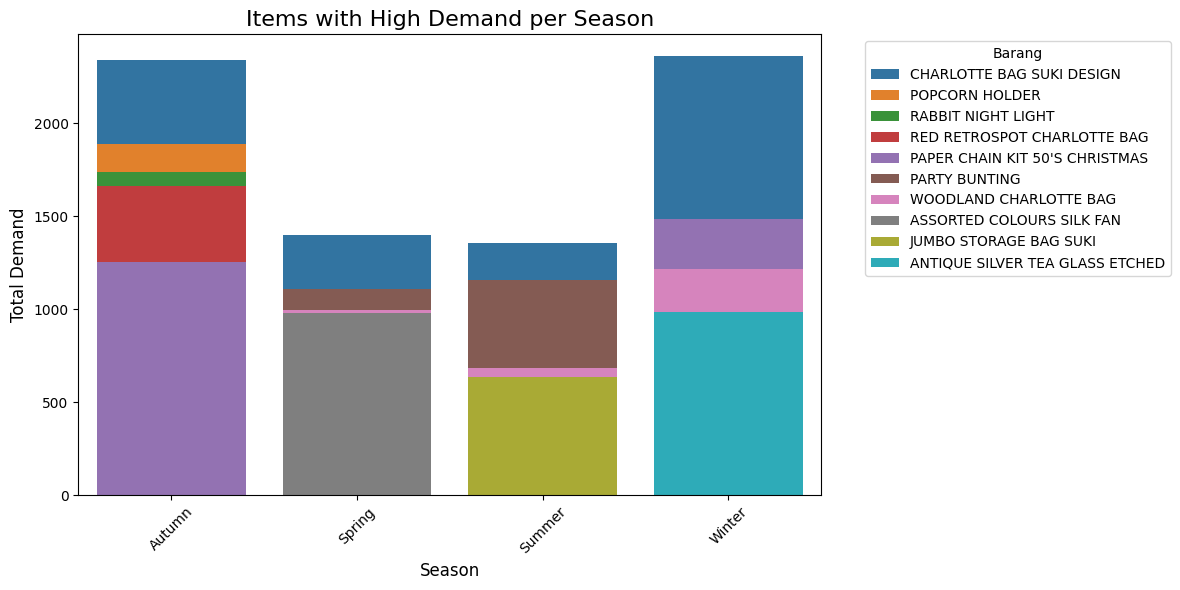

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_items_per_season_2, x='Season', y='Quantity', hue='Description', dodge=False)
plt.title('Items with High Demand per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Demand', fontsize=12)
plt.legend(title='Barang', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Autumn and Summer Dominate Demand

    The chart shows that Autumn has the highest demand, driven by items like “Paper Chain Kit 50's Christmas” and “Red Retrospot Charlotte Bag”. This likely relates to preparations for year-end gatherings, including family events or office celebrations. Summer follows closely, with demand for items like “Jumbo Storage Bag Suki”, which may align with outdoor activities or school holiday preparations.

    Businesses should focus on promoting decorative and storage products during Autumn to meet the year-end demand. In Summer, highlight campaigns targeting outdoor needs or home organization, such as bundled offers and discounts.


2. Winter and Spring Offer Niche Demand

    During Winter, demand is high for items like “Antique Silver Tea Glass Etched” and “Paper Chain Kit 50's Christmas”, reflecting a focus on decorations and festive goods for Christmas and New Year celebrations. In contrast, Spring shows lower but steady demand, driven by niche items like “Woodland Charlotte Bag” and “Assorted Colours Silk Fan”, which cater to small events or leisure needs.

    To maximize sales in Winter, businesses should launch themed campaigns focused on festive decorations and gifts. For Spring, leverage niche products with targeted promotions, such as event bundles or everyday-use offers, to maintain year-round revenue stability.

## Conclusion 

The analysis reveals that both datasets, with and without missing values in the Customer ID column, show similar trends regarding seasonal and weekly sales patterns. However, key differences exist:

1. Sales Trends:

    - For the data with missing values, sales between February and October remain low with occasional minor increases, suggesting a more pronounced seasonal drop.
    - For the data without missing values, sales are slightly more stable during the same period, indicating fewer data gaps and more accurate trends.

2. Item Demand by Season:

    - Both datasets highlight Autumn and Summer as dominant demand periods. However, the data without missing values provides clearer insights into item-level demand, such as specific products driving seasonal sales.
    - The dataset with missing values shows similar patterns but lacks precision, which may underestimate niche demand in Winter and Spring.  
    
In conclusion, missing values in the Customer ID column lead to less accurate insights, particularly for sales stability and niche product demand, potentially affecting strategic business decisions.

The missing values in the Customer ID column reduce the accuracy of sales trend analysis and product demand insights. Without this critical data, businesses may struggle to identify repeat customers, track purchase behavior, and personalize marketing efforts. This gap can impact strategies for customer retention and targeted promotions.

Here are some actions that we could do to increase the data of CustomerID:

1. Enhance the process of capturing Customer ID by ensuring mandatory input during transactions, both online and offline.
2. Encourage customers to provide their IDs by offering loyalty rewards or discounts for registered purchases.
3. Implement or optimize a Customer Relationship Management (CRM) system to ensure consistent and accurate customer tracking.  

## Further Improvement Analysis 

1. Deeper Analysis on Negative Values in UnitPrice:
Negative values in the UnitPrice column likely indicate data entry errors, refunds, or returns. These should be investigated to ensure data accuracy, as incorrect pricing can skew revenue insights and profit calculations. Resolving these issues will enhance financial analysis and forecasting.

2. Separate Analysis for UK and Other Countries:
Since the UK dominates the data, separating it from other countries will allow more precise regional insights. This distinction helps identify unique purchasing patterns, customer behavior, and regional opportunities outside the UK. Businesses can then tailor marketing strategies and product offerings for each market.

3. Analysis of Extremely High Prices:
Extremely high-priced items should be analyzed to determine if they represent luxury products, outliers, or data errors. For luxury goods, businesses can assess market demand and create targeted promotions. If the values are errors, they must be corrected to avoid misleading business decisions.